In [1]:
### Load model mechanisms

In [2]:
modelPath = 'Models/Shen1999'
modelName = 'Shen1999'

def getSomaScript(h):
    
    h.load_file('mosinit.hoc')

    # Clear existing stimulation
    for i in h.IClamp:
        i.amp = 0

    soma = h.soma

    return h.soma

### Create a NeuronUnit model

In [3]:
%matplotlib inline
import helpers

mod1 = helpers.createModel(name = modelName, \
                           path = modelPath, \
               getSectionScript = getSomaScript)

mod1.setIntegrationMethod("variable")

# Interactively find stimulation currents
#helpers.IClampWidget(mod1)

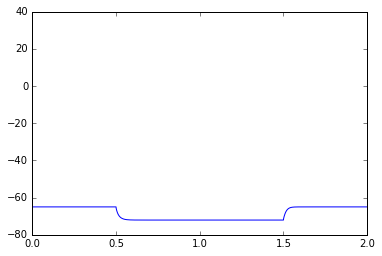

In [4]:
helpers.IClampWidget(mod1)

In [5]:
from quantities import nA, s, ms

# Set currents
i_rest =    {'amplitude':     0*nA, 'delay': 0.5*s, 'duration': 1*s}
i_passive = {'amplitude':  -0.1*nA, 'delay': 0.5*s, 'duration': 1*s}
i_ap  =     {'amplitude':     2*nA, 'delay': 0.5*s, 'duration': 1*ms}
i_thresh =  {'amplitude':  .128*nA, 'delay': 0.5*s, 'duration': 1000*ms}

### Define tests to run

----------
Running Test: Resting potential test
Expected: -57.4345864662 mV +/- 24.630188347 mV SD
Actual: -65.0000000036 mV, Z: -0.307160198325 SDs


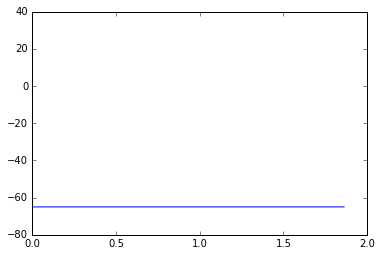

----------
Running Test: Resting potential test
Expected: -57.4345864662 mV +/- 24.630188347 mV SD
Actual: -65.0000000036 mV, Z: -0.307160198325 SDs


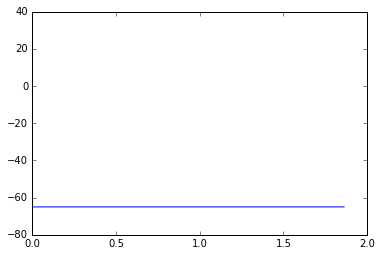

----------
Running Test: Input resistance test
Expected: 145113133.641 ohm +/- 189410293.868 ohm SD
Actual: 70733907.5844 kg*m**2/(s**3*A**2), Z: -0.392688404296 SDs


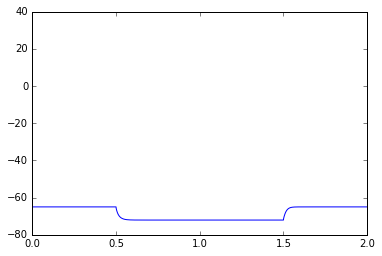

----------
Running Test: Time constant test
Expected: 27.9651006711 ms +/- 66.3591805191 ms SD
Actual: 22.6510221866 ms, Z: -0.0800805320824 SDs


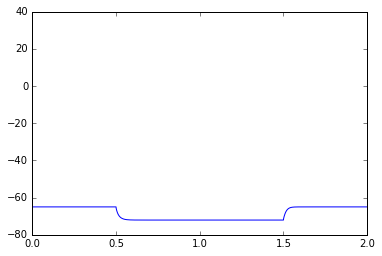

----------
Running Test: Injected current AP width test
Expected: 1.513125 ms +/- 0.961592715477 ms SD
Actual: 0.84375 ms, Z: -0.696110722582 SDs


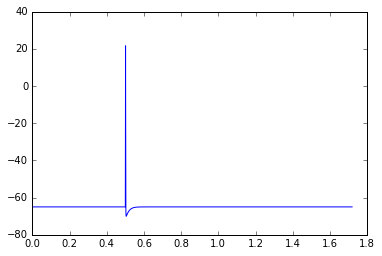

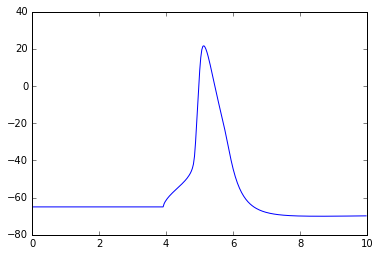

----------
Running Test: Injected current AP threshold test
Expected: -34.6053571429 mV +/- 56.7790487536 mV SD
Actual: -43.6364530063 mV, Z: -0.159056836309 SDs


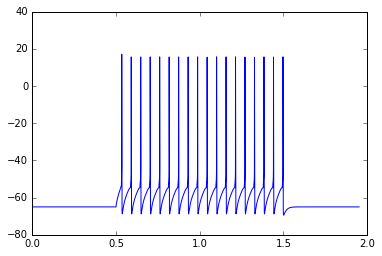

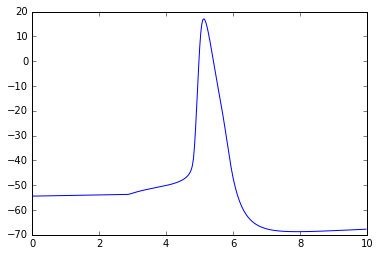

----------
Running Test: Injected current AP amplitude test
Expected: 68.776 mV +/- 50.4271404587 mV SD
Actual: 59.3333638107 mV, Z: -0.187253056656 SDs


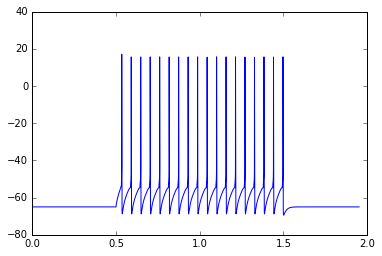

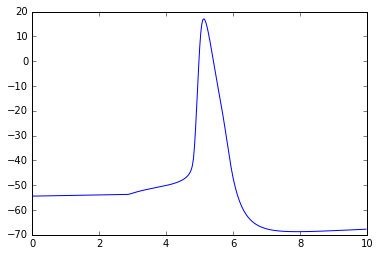

In [6]:
# Initialize the tests and get their expected values
tests = helpers.setupTests(i_rest, i_passive, i_ap, i_thresh, expectedSource = "Pooled")

helpers.runOneTest(tests[0], mod1)

results = helpers.runAllTests(tests,mod1)

In [ ]:
pp(results)
helpers.saveResults(results)
pp(helpers.loadResults())
mod1.h.quit()

{'Shen1999': {'Injected current AP amplitude test': array(59.33336381069728) * mV,
              'Injected current AP threshold test': array(-43.636453006253504) * mV,
              'Injected current AP width test': array(0.84375) * ms,
              'Input resistance test': array(70733907.58437455) * kg*m**2/(s**3*A**2),
              'Resting potential test': array(-65.00000000361584) * mV,
              'Time constant test': array(22.651022186624957) * ms}}
{'BhallaBower1993': {'Injected current AP amplitude test': array(71.32715773727804) * mV,
                     'Injected current AP threshold test': array(-40.35042798167796) * mV,
                     'Injected current AP width test': array(0.5333333333333333) * ms,
                     'Input resistance test': array(51778384.93506186) * kg*m**2/(s**3*A**2),
                     'Resting potential test': array(-65.83856328513072) * mV,
                     'Time constant test': array(43.997403548975335) * ms},
 'Chen2002': {'Inj